In [2]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("paper", font_scale=1.3)
sns.set_style({'font.family': 'Times New Roman'})

calls = pd.read_csv('valencia_metro/data/calls/2019/2019.csv', index_col=0, skiprows=5)
stations = pd.read_csv('valencia_metro/data/stations/all_stations.csv', index_col=0)
ambulances = pd.read_csv('valencia_metro/data/base/ambulances/base.csv', index_col=0, skiprows=1)

In [3]:
calls['day'] = calls['arrivalTime'].apply(lambda x: int(np.ceil(x)))
import datetime

def get_month(day_of_year, year):
    date_object = datetime.datetime.strptime(f'{year}-{int(day_of_year)}', '%Y-%j')
    month = date_object.strftime('%B')
    if month == 'January':return 'Enero'
    elif month == 'February':return 'Febrero'
    elif month == 'March': return 'Marzo'
    elif month == 'April':return 'Abril'
    elif month == 'May':return 'Mayo'
    elif month == 'June':return 'Junio'
    elif month == 'July':return 'Julio'
    elif month == 'August':return 'Agosto'
    elif month == 'September':return 'Septiembre'
    elif month == 'October':return 'Octubre'
    elif month == 'November':return 'Noviembre'
    elif month == 'December':return 'Diciembre'

calls['mes'] = calls.apply(lambda x: get_month(x['day'], 2019), axis=1)

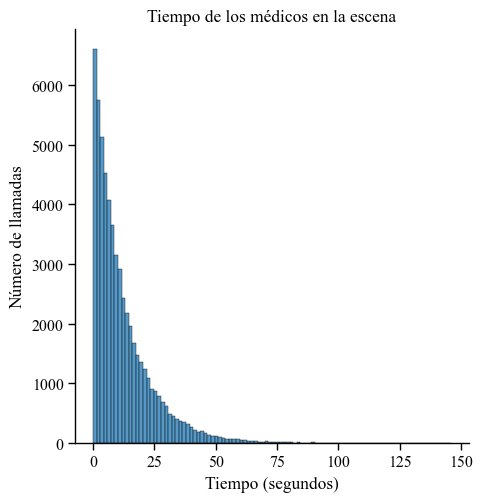

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(calls["onSceneDuration"] * 24 * 60, kde=False, rug=False, bins=100)
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Número de llamadas")
plt.title("Tiempo de los médicos en la escena")
plt.show()

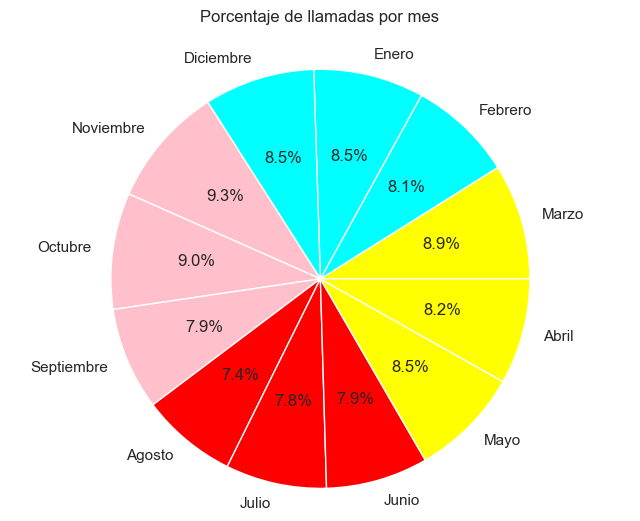

In [5]:
month_order = [
'Marzo', 'Febrero', 'Enero', 'Diciembre', 'Noviembre', 'Octubre',
'Septiembre', 'Agosto', 'Julio', 'Junio', 'Mayo', 'Abril'
]
sns.set(color_codes=True)
call_counts = calls['mes'].value_counts().loc[month_order]

colors = ['yellow', 'cyan', 'cyan', 'cyan', 'pink', 'pink',
'pink', 'red', 'red', 'red', 'yellow', 'yellow']

plt.figure(figsize=(8, 6))
plt.pie(call_counts, labels=call_counts.index, autopct='%1.1f%%', colors=colors)
plt.title("Porcentaje de llamadas por mes\n")
plt.axis('equal') # La relación de aspecto igual garantiza que el gráfico sea un círculo

plt.show()


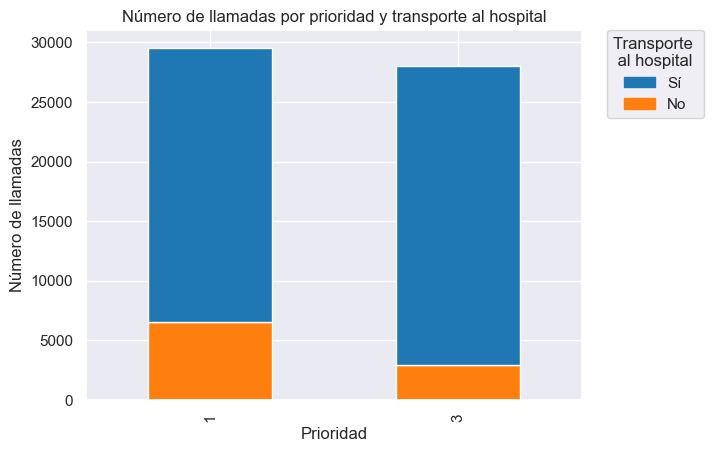

In [6]:
call_counts = calls.groupby(['priority', 'transport']).size().unstack()

colores = ['#FF7F0E', '#1F77B4']

call_counts.plot(kind='bar', stacked=True, color=colores)
plt.xlabel('Prioridad')
plt.ylabel('Número de llamadas')
plt.title('Número de llamadas por prioridad y transporte al hospital')

etiquetas_leyenda = ['Sí', 'No']
manijas_leyenda = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colores[::-1]]
plt.legend(manijas_leyenda, etiquetas_leyenda, title='Transporte \n al hospital', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

In [7]:
ambulances = ambulances.merge(stations, left_on='stationIndex', right_on='ID')
ambulances = ambulances[['stationIndex', 'class', 'NAME', 'x', 'y']]
ambulances['x'] = ambulances['x'] + np.random.normal(0, 0.001, len(ambulances))

In [8]:
ambulancesBetter = pd.DataFrame(columns=["stationIndex", "class"])
ambulancesBetter = ambulancesBetter.merge(stations, left_on='stationIndex', right_on='ID')
ambulancesBetter = ambulancesBetter[['stationIndex', 'class', 'NAME', 'x', 'y']]
#add a random number to the coordinates to avoid overlapping
ambulancesBetter['x'] = ambulancesBetter['x'] + np.random.normal(0, 0.0001, len(ambulancesBetter))
ambulancesBetter['y'] = ambulancesBetter['y'] + np.random.normal(0, 0.0001, len(ambulancesBetter))


In [35]:
AmbulanceExamples = [[39.51076268851388, -0.4565814134321452],
 [39.49275974, -0.3592327212381208],
 [39.48262998, -0.35923218664696827],
 [39.44344999, -0.38977864957359437],
 [39.47803189834137, -0.40141305834704705],
 [39.47803189834137, -0.40241305834704705]]

In [9]:
map_obj = folium.Map(location = [39.432223, -0.480828], zoom_start = 11, scrollWheelZoom = True)
callsCount = calls.groupby(['x', 'y']).size().reset_index(name='counts')
show_marks = [False, True, False]

if show_marks[0]: #ALL STATIONS
    stationsPlace = stations[['y', 'x']].values.tolist()
    for i in range(len(stationsPlace)):
        folium.Marker(stationsPlace[i], popup=(stations['NAME'].iloc[i], stations['ID'].iloc[i]), icon=folium.Icon(icon="hospital", prefix='fa', size='small')).add_to(map_obj)
if show_marks[1]: #AMBULANCES ACTUAL
    ambulancesPlace = ambulances[['y', 'x']].values.tolist()
    for i in range(len(ambulancesPlace)):
        if ambulances['class'].iloc[i] == 1:
            folium.Marker(ambulancesPlace[i], popup=(ambulances['NAME'].iloc[i], ambulances['stationIndex'].iloc[i]), icon=folium.Icon(icon="ambulance", prefix='fa', color='red')).add_to(map_obj)
        elif ambulances['class'].iloc[i] == 2:
            folium.Marker(ambulancesPlace[i], popup=(ambulances['NAME'].iloc[i], ambulances['stationIndex'].iloc[i]), icon=folium.Icon(icon="ambulance", prefix='fa', color='green')).add_to(map_obj)
if show_marks[2]: #5 examples
    ambulancesPlace = AmbulanceExamples
    for i in range(len(ambulancesPlace)):
        if i in [0,1,4]:
            folium.Marker(ambulancesPlace[i], popup=(ambulances['NAME'].iloc[i], ambulances['stationIndex'].iloc[i]), icon=folium.Icon(icon="ambulance", prefix='fa', color='red')).add_to(map_obj)
        else:
            folium.Marker(ambulancesPlace[i], popup=(ambulances['NAME'].iloc[i], ambulances['stationIndex'].iloc[i]), icon=folium.Icon(icon="ambulance", prefix='fa', color='green')).add_to(map_obj)
map_obj

In [10]:
callsCountPriority1 = calls[calls['priority'] == 1].groupby(['x', 'y']).size().reset_index(name='counts')
callsCountPriority3 = calls[calls['priority'] == 3].groupby(['x', 'y']).size().reset_index(name='counts')

map_obj = folium.Map(location = [39.432223, -0.480828], zoom_start = 11, scrollWheelZoom = False)
HeatMap(data=callsCountPriority3[['y', 'x', 'counts']].values.tolist(), radius=13, max_zoom=13).add_to(map_obj)

map_obj

In [17]:
callsDay1 = pd.read_csv('valencia_metro/data/calls/2019/2019.csv', index_col=0, skiprows=5)
map_obj = folium.Map(location = [39.432223, -0.480828], zoom_start = 11, scrollWheelZoom = False)
callsCount = callsDay1.groupby(['x', 'y']).size().reset_index(name='counts')
show_marks = [0,0,0]
HeatMap(data=callsCount[['y', 'x', 'counts']].values.tolist(), radius=13, max_zoom=13).add_to(map_obj)

if show_marks[0]:
    stationsPlace = stations[['y', 'x']].values.tolist()
    for i in range(len(stationsPlace)):
        folium.Marker(stationsPlace[i], popup=(stations['NAME'].iloc[i], stations['ID'].iloc[i]), icon=folium.Icon(icon="hospital", prefix='fa')).add_to(map_obj)
if show_marks[1]:
    ambulancesPlace = ambulances[['y', 'x']].values.tolist()
    for i in range(len(ambulancesPlace)):
        if ambulances['class'].iloc[i] == 1:
            folium.Marker(ambulancesPlace[i], popup=(ambulances['NAME'].iloc[i], ambulances['stationIndex'].iloc[i]), icon=folium.Icon(icon="ambulance", prefix='fa', color='red')).add_to(map_obj)
        elif ambulances['class'].iloc[i] == 2:
            folium.Marker(ambulancesPlace[i], popup=(ambulances['NAME'].iloc[i], ambulances['stationIndex'].iloc[i]), icon=folium.Icon(icon="ambulance", prefix='fa', color='green')).add_to(map_obj)
map_obj